In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as sts

In [2]:
# df = pd.read_csv("./patent.tsv", sep="\t", nrows = 500 )
application_df = pd.read_csv("csv_patent_2019/application_data.csv")

C:\Users\gongl\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1,3,4,5,6,8,9,10,12,13,14,16,17,18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
application_df.head()

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,confirm_number,atty_docket_number,appl_status_desc,...,file_location_date,earliest_pgpub_number,earliest_pgpub_date,wipo_pub_number,wipo_pub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator,aia_first_to_file
0,2000161,NaN,Utility,NaN,NaN,NaN,NaN,1014.0,NaN,NaN,...,2000-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED,NaN
1,2022946,NaN,Utility,NaN,NaN,NaN,NaN,1141.0,NaN,NaN,...,2000-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED,NaN
2,2032617,NaN,Utility,NaN,NaN,NaN,NaN,1195.0,NaN,NaN,...,2000-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED,NaN
3,2045760,1948-08-23,NaN,NaN,NaN,NaN,NaN,1267.0,NaN,Patented File - (Old Case Added for File Track...,...,1986-08-11,NaN,NaN,NaN,NaN,2480888,1949-09-06,BOX STAYING MACHINE,UNDISCOUNTED,false
4,2048602,NaN,NaN,NaN,NaN,NaN,NaN,1286.0,NaN,Patented File - (Old Case Added for File Track...,...,2018-11-06,NaN,NaN,NaN,NaN,RE19792,1935-12-17,NaN,UNDISCOUNTED,NaN


In [4]:
# Drop the unused columns
application_cleaned = application_df.drop(columns=['confirm_number', 'wipo_pub_number', 'wipo_pub_date', 'aia_first_to_file'])
application_cleaned

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator
0,2000161,NaN,Utility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISSING,2000-01-21,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
1,2022946,NaN,Utility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISSING,2000-01-21,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
2,2032617,NaN,Utility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISSING,2000-01-21,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
3,2045760,1948-08-23,NaN,NaN,NaN,NaN,NaN,NaN,Patented File - (Old Case Added for File Track...,1986-04-25,FILE REPOSITORY (FRANCONIA),1986-08-11,NaN,NaN,2480888,1949-09-06,BOX STAYING MACHINE,UNDISCOUNTED
4,2048602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Patented File - (Old Case Added for File Track...,1984-03-22,FILE REPOSITORY (FRANCONIA),2018-11-06,NaN,NaN,RE19792,1935-12-17,NaN,UNDISCOUNTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15494290,PCT/ZW98/00011,NaN,PCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15494291,PCT/ZW98/00012,NaN,PCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15494292,PCT/ZW98/00013,NaN,PCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15494293,PCT/ZW98/00014,NaN,PCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
application_cleaned.to_csv("csv_output/application_cleaned.csv")

In [6]:
application_cleaned["application_number"].count()

15494295

In [7]:
# Check out the latest date for patent_issue_date: 2021-04-21, good dataset!

application_cleaned.sort_values(["patent_issue_date"], ascending = False).head(2)

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator
8610530,15748314,2018-01-29,Utility,"SHEN, BIN",1653,435,404000,MERCK-4681,Notice of Allowance Mailed -- Application Rece...,2019-12-20,ELECTRONIC,NaN,US20180216061A1,2018-08-02,10626364,2020-04-21,METHOD FOR INCREASING THE GLUTATHIONE LEVEL IN...,UNDISCOUNTED
9039493,16227984,2018-12-20,Utility,"VOSTAL, ONDREJ C",2458,709,238000,11413/006414-US1,NaN,NaN,ELECTRONIC,NaN,NaN,NaN,10630572,2020-04-21,"OPEN LOOP, CLOSED LOOP, REAL AND NEAR REAL-TIM...",SMALL


In [8]:
# Create most refined DataFrame for future patented cases study
application_cleaned_nona = application_cleaned.loc[(application_cleaned["patent_issue_date"].map(pd.isna) == False) 
                                                    & (application_cleaned["filing_date"].map(pd.isna) == False)
                                                    & (application_cleaned["uspc_class"].map(pd.isna) == False)
                                                    & (application_cleaned["appl_status_desc"] == "Patented Case"), :]


# Calculate days between patent_issue_date and filing_date
df_date_ser = pd.to_datetime(application_cleaned_nona['patent_issue_date'], errors = 'coerce') - pd.to_datetime(application_cleaned_nona['filing_date'], errors = 'coerce')
application_cleaned_nona['patent_issue_and_file_date_delta'] = df_date_ser.dt.days

application_cleaned_nona = application_cleaned_nona.loc[(application_cleaned_nona['patent_issue_and_file_date_delta']) > 0, :]


# application_cleaned_nona['patent_issue_and_file_date_delta'].dtype

<ipython-input-8-383f9eb11c8a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_cleaned_nona['patent_issue_and_file_date_delta'] = df_date_ser.dt.days


In [9]:
application_cleaned_nona.sort_values(["patent_issue_and_file_date_delta"], ascending = False).head(3)

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator,patent_issue_and_file_date_delta
43,2682096,1933-07-25,Utility,"GREGORY, BERNARR E",3662,380,026000,NaN,Patented Case,2000-07-12,FILE REPOSITORY (FRANCONIA),2018-06-23,NaN,NaN,6097812,2000-08-01,NaN,UNDISCOUNTED,24479
7,2107244,1936-10-23,Utility,"GREGORY, BERNARR E",3662,380,026000,NaN,Patented Case,2000-09-20,FILE REPOSITORY (FRANCONIA),2018-06-23,NaN,NaN,6130946,2000-10-10,NaN,UNDISCOUNTED,23363
35,2618355,1945-09-24,Utility,"KEITH, JACK W",3641,423,149000,S-2509,Patented Case,2004-06-24,OTHER,2019-02-08,NaN,NaN,6761862,2004-07-13,METHOD OF DETERMINING THE EXTENT TO WHICH A NI...,UNDISCOUNTED,21477


In [10]:
# Since D25 and D12 have close patented rate, making me interested to check on their property: patent_issue_and_file_date_delta, calculate Independent (Two Sample) t-test
application_cleaned_nona.head(5)

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator,patent_issue_and_file_date_delta
7,2107244,1936-10-23,Utility,"GREGORY, BERNARR E",3662,380,026000,NaN,Patented Case,2000-09-20,FILE REPOSITORY (FRANCONIA),2018-06-23,NaN,NaN,6130946,2000-10-10,NaN,UNDISCOUNTED,23363
28,2565523,1944-11-28,Utility,"HUNT, BROOKS H",2204,419,002000,NaN,Patented Case,1992-07-09,FILE REPOSITORY (FRANCONIA),2018-06-22,NaN,NaN,5132080,1992-07-21,PRODUCTION OF ARTICLES FROM POWDERED METALS,UNDISCOUNTED,17402
29,2568368,1944-12-15,Utility,"GREGORY, BERNARR E",3662,380,026000,NaN,Patented Case,2000-12-26,FILE REPOSITORY (FRANCONIA),2018-06-23,NaN,NaN,6175625,2001-01-16,NaN,UNDISCOUNTED,20486
33,2591067,1945-04-30,Utility,NaN,2202,179,00150M,NaN,Patented Case,1980-07-22,FILE REPOSITORY (FRANCONIA),1999-06-10,NaN,NaN,4214126,1980-07-22,NaN,UNDISCOUNTED,12867
34,2602618,1945-06-30,Utility,"BENTLEY, STEPHEN",2201,999,005000,NaN,Patented Case,1990-07-18,FILE REPOSITORY (FRANCONIA),2018-08-07,NaN,NaN,4956612,1990-09-11,MAGNETIC MINE FIRING CIRCUIT,UNDISCOUNTED,16509


In [11]:
D25_df = application_cleaned_nona.loc[(application_cleaned_nona['uspc_class']) == 'D25', :]
D25_df.head(5)
D25 = D25_df['patent_issue_and_file_date_delta']
D25.mean()

582.0977031196435

In [12]:
D12_df = application_cleaned_nona.loc[(application_cleaned_nona['uspc_class']) == 'D12', :]
D12_df.head(5)
D12 = D12_df['patent_issue_and_file_date_delta']
D12.mean()

549.9327655970641

In [13]:
# Calculate Independent (Two Sample) t-test
sts.ttest_ind(D25, D12, equal_var=False) 

Ttest_indResult(statistic=10.96380215526102, pvalue=7.027939464538541e-28)

In [14]:
#p-value is very small, so can reject the null hypo D25 and D12 mean are the same from the patent_issue_and_file_date_delta perspective

In [15]:
# We can use this test, if we observe two independent samples from the same or different population, e.g. exam scores of boys and girls or of two ethnic groups. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [16]:
application_cleaned_nona.count()

application_number                  4964813
filing_date                         4964813
application_invention_type          4964794
examiner_full_name                  4900260
examiner_art_unit                   4964721
uspc_class                          4964813
uspc_subclass                       4964796
atty_docket_number                  4734175
appl_status_desc                    4964813
appl_status_date                    4964813
file_location                       4964813
file_location_date                  1477008
earliest_pgpub_number               2913174
earliest_pgpub_date                 2913174
patent_number                       4964813
patent_issue_date                   4964813
invention_title                     4964380
small_entity_indicator              4964803
patent_issue_and_file_date_delta    4964813
dtype: int64

In [17]:
application_cleaned_nona["appl_status_desc"].unique()

array(['Patented Case'], dtype=object)

In [18]:
application_cleaned_nona["patent_issue_and_file_date_delta"].describe().apply(lambda x: format(x, 'f'))

count    4964813.000000
mean         930.683743
std          546.752235
min            1.000000
25%          564.000000
50%          813.000000
75%         1153.000000
max        24479.000000
Name: patent_issue_and_file_date_delta, dtype: object

In [19]:
application_cleaned_nona.loc[(application_cleaned_nona['patent_issue_and_file_date_delta']) == 1, :]

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator,patent_issue_and_file_date_delta
2035296,8685821,1998-08-31,Utility,"COONEY, JOHN M",1711,252,067000,3518.05,Patented Case,1998-09-04,FILE REPOSITORY (FRANCONIA),2018-06-23,NaN,NaN,5800729,1998-09-01,MIXTURES OF PENTAFLUOROPROPANE AND A HYDROFLUO...,UNDISCOUNTED,1


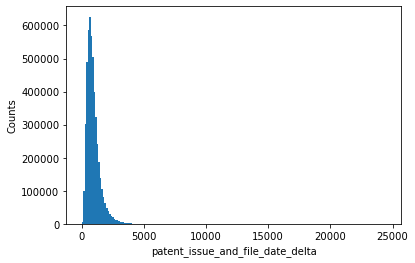

NormaltestResult(statistic=354.9281765466098, pvalue=8.478630848560749e-78)


In [20]:
patent_issue_and_file_date_delta = application_cleaned_nona["patent_issue_and_file_date_delta"]

plt.hist(patent_issue_and_file_date_delta, bins=200)
plt.xlabel('patent_issue_and_file_date_delta')
plt.ylabel('Counts')
plt.savefig('application_data_1', dpi=100)
plt.show()

print(sts.normaltest(patent_issue_and_file_date_delta.sample(500)))

NormaltestResult(statistic=429.1097680883064, pvalue=6.606900923752325e-94)


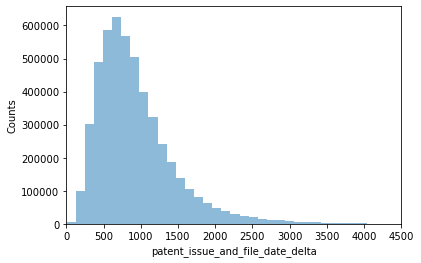

In [21]:
plt.hist(patent_issue_and_file_date_delta, bins=200, alpha=0.5)
plt.xlabel('patent_issue_and_file_date_delta')
plt.ylabel('Counts')
plt.xlim(0,4500)
plt.savefig('application_data_2', dpi=100)
print(sts.normaltest(patent_issue_and_file_date_delta.sample(1000)))


# print(sts.normaltest(temperatures.sample(50)))  #pvalue!!!!!!!!!!!reject or not reject the hypo. when pvalue is high 0.8, can not reject null hypothesis # it is more meaningful when pvalue is small because it helps you to rule out a hypo
# Given the null hypothesis that x came from a normal distribution, if the p-val is very small, it enables them to reject the null hypothesis 

In [22]:
# Under application_invention_type, check on patent_issue_and_file_date_delta

In [23]:
application_cleaned_nona.groupby(['application_invention_type'])

In [24]:
invention_type = application_cleaned_nona.groupby(['application_invention_type']).count()
invention_type

,application_number,filing_date,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator,patent_issue_and_file_date_delta
application_invention_type,,,,,,,,,,,,,,,,,,
Design,618563,618563,613820,618563,618563,618560,569580,618563,618563,618563,234724,0,0,618563,618563,618552,618561,618563
Plant,26725,26725,26606,26725,26725,26723,17128,26725,26725,26725,9907,7340,7340,26725,26725,26724,26725,26725
Re-Issue,15184,15184,14633,15183,15184,15184,13765,15184,15184,15184,6997,1,1,15184,15184,15181,15184,15184
Utility,4304322,4304322,4245195,4304241,4304322,4304310,4133700,4304322,4304322,4304322,1225363,2905832,2905832,4304322,4304322,4303910,4304314,4304322


In [ ]:
# Use groupby.mean() to show the average patent_issue_and_file_date_delta under each application_invention_type

In [105]:
invention_type = application_cleaned_nona.groupby(['application_invention_type']).mean()
invention_type

,patent_issue_and_file_date_delta
application_invention_type,
Design,575.863870
Plant,598.464247
Re-Issue,1189.242953
Utility,982.814782


<AxesSubplot:xlabel='application_invention_type'>

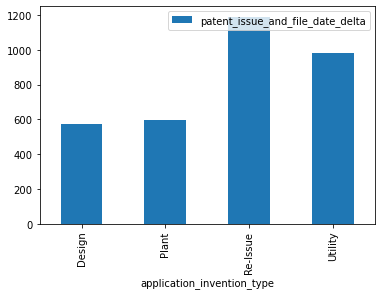

In [108]:
invention_type.plot(kind="bar")

In [114]:
lgtest = application_cleaned_nona.groupby(['application_invention_type'])
lgtest

Design           AxesSubplot(0.1,0.559091;0.363636x0.340909)
Plant       AxesSubplot(0.536364,0.559091;0.363636x0.340909)
Re-Issue             AxesSubplot(0.1,0.15;0.363636x0.340909)
Utility         AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

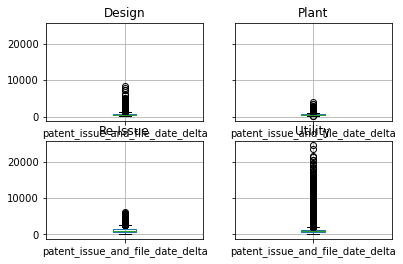

In [115]:
lgtest.boxplot()

In [25]:
invention_type['patent_issue_and_file_date_delta'].value_counts().head(20)

26725      1
618563     1
4304322    1
15184      1
Name: patent_issue_and_file_date_delta, dtype: int64

In [26]:
application_cleaned_nona['application_invention_type'].unique()

array(['Utility', nan, 'Re-Issue', 'Plant', 'Design'], dtype=object)

In [27]:
utility = application_cleaned_nona.loc[application_cleaned_nona['application_invention_type'] == "Utility", :]
utility.head(3)

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator,patent_issue_and_file_date_delta
7,2107244,1936-10-23,Utility,"GREGORY, BERNARR E",3662,380,026000,NaN,Patented Case,2000-09-20,FILE REPOSITORY (FRANCONIA),2018-06-23,NaN,NaN,6130946,2000-10-10,NaN,UNDISCOUNTED,23363
28,2565523,1944-11-28,Utility,"HUNT, BROOKS H",2204,419,002000,NaN,Patented Case,1992-07-09,FILE REPOSITORY (FRANCONIA),2018-06-22,NaN,NaN,5132080,1992-07-21,PRODUCTION OF ARTICLES FROM POWDERED METALS,UNDISCOUNTED,17402
29,2568368,1944-12-15,Utility,"GREGORY, BERNARR E",3662,380,026000,NaN,Patented Case,2000-12-26,FILE REPOSITORY (FRANCONIA),2018-06-23,NaN,NaN,6175625,2001-01-16,NaN,UNDISCOUNTED,20486


In [28]:
utility['patent_issue_and_file_date_delta'].mean() # 2.693 years

982.8147822119256

In [30]:
design = application_cleaned_nona.loc[application_cleaned_nona['application_invention_type'] == "Design", :]
design.head(3)

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator,patent_issue_and_file_date_delta
8756,5242298,1972-04-07,Design,NaN,2902,406,028000,NaN,Patented Case,1980-12-08,FILE REPOSITORY (FRANCONIA),1999-06-10,NaN,NaN,D258252,1981-02-17,NaN,UNDISCOUNTED,3238
13721,5442777,1974-02-15,Design,NaN,2902,D87,00100D,NONE,Patented Case,1978-10-03,FILE REPOSITORY (FRANCONIA),1999-06-10,NaN,NaN,D249823,1978-10-03,TAPE CARTRIDGE AND CASSETTE CABINET,UNDISCOUNTED,1691
17191,5541918,1975-01-20,Design,"GANDY, JAMES M",2901,D12,105000,NaN,Patented Case,1982-03-30,FILE REPOSITORY (FRANCONIA),1999-06-10,NaN,NaN,D264699,1982-06-01,UTILITY CARRIER CART,UNDISCOUNTED,2689


In [31]:
design['patent_issue_and_file_date_delta'].mean() # 1.578 years

575.8638699695908

In [32]:
# Under uspc_class, check on patent_issue_and_file_date_delta

In [33]:
application_cleaned_nona.count()

application_number                  4964813
filing_date                         4964813
application_invention_type          4964794
examiner_full_name                  4900260
examiner_art_unit                   4964721
uspc_class                          4964813
uspc_subclass                       4964796
atty_docket_number                  4734175
appl_status_desc                    4964813
appl_status_date                    4964813
file_location                       4964813
file_location_date                  1477008
earliest_pgpub_number               2913174
earliest_pgpub_date                 2913174
patent_number                       4964813
patent_issue_date                   4964813
invention_title                     4964380
small_entity_indicator              4964803
patent_issue_and_file_date_delta    4964813
dtype: int64

In [34]:
s = application_cleaned_nona.groupby(['uspc_class'])
s.count()
# pd.set_option('display.max_rows', None)
s['patent_issue_and_file_date_delta'].value_counts().tail(50)

uspc_class  patent_issue_and_file_date_delta
PLT         2422                                1
            2474                                1
            2476                                1
            2486                                1
            2490                                1
            2510                                1
            2514                                1
            2540                                1
            2570                                1
            2668                                1
            2731                                1
            2754                                1
            2830                                1
            2919                                1
            2938                                1
            3386                                1
            3410                                1
            3885                                1
XXX         648                                 2
     

In [35]:
m = pd.DataFrame(s['patent_issue_and_file_date_delta'].value_counts())
m.tail(50)

patent_issue_and_file_date_delta
uspc_class patent_issue_and_file_date_delta                                  
PLT        2422                                                             1
           2474                                                             1
           2476                                                             1
           2486                                                             1
           2490                                                             1
           2510                                                             1
           2514                                                             1
           2540                                                             1
           2570                                                             1
           2668                                                             1
           2731                                                             1
           2754                                                             1
           2830                                                             1
           2919                                                             1
           2938                                                             1
           3386                                                             1
           3410                                                             1
           3885                                                             1
XXX        648                                                              2
           312                                                              1
           330                                                              1
           411                                                              1
           419                                                              1
           454                                                              1
           512                                                              1
           607                                                              1
           608                                                              1
           687                                                              1
           694                                                              1
           700                                                              1
           715                                                              1
           760                                                              1
           908                                                              1
           985                                                              1
           995                                                              1
           1033                                                             1
           1093                                                             1
           1276                                                             1
           1307                                                             1
           1338                                                             1
           1411                                                             1
           1456                                                             1
           1569                                                             1
           1573                                                             1
           1716                                                             1
           1807                                                             1
           1856                                                             1
           2112                                                             1
           2435                                                             1
           3515                                                    

In [36]:
# reset the DataFrame to make it easy to calculate
m = m.rename(columns={"patent_issue_and_file_date_delta": "patented_cases_per_class"})
m
m_resetindex = m.reset_index()
m_resetindex.tail(50)

,uspc_class,patent_issue_and_file_date_delta,patented_cases_per_class
797634,PLT,2422,1
797635,PLT,2474,1
797636,PLT,2476,1
797637,PLT,2486,1
797638,PLT,2490,1
797639,PLT,2510,1
797640,PLT,2514,1
797641,PLT,2540,1
797642,PLT,2570,1
797643,PLT,2668,1


In [37]:
m_resetindex['total_delta'] = m_resetindex['patent_issue_and_file_date_delta'] * m_resetindex['patented_cases_per_class']
type(m_resetindex)
m_resetindex.tail(40)

,uspc_class,patent_issue_and_file_date_delta,patented_cases_per_class,total_delta
797644,PLT,2731,1,2731
797645,PLT,2754,1,2754
797646,PLT,2830,1,2830
797647,PLT,2919,1,2919
797648,PLT,2938,1,2938
797649,PLT,3386,1,3386
797650,PLT,3410,1,3410
797651,PLT,3885,1,3885
797652,XXX,648,2,1296
797653,XXX,312,1,312


In [95]:
x = m_resetindex.groupby('uspc_class').sum() # Will method, more efficient

In [99]:
(x['total_delta']/x['patented_cases_per_class']).tail() # Will method, more efficient, same result as shown below

uspc_class
D96     813.000000
D99     571.559028
ENG     705.000000
PLT     599.330952
XXX    1117.878788
dtype: float64

In [38]:
r = m_resetindex.groupby(['uspc_class'])
r.count().tail(5)
# type(r)
# r.head()

,patent_issue_and_file_date_delta,patented_cases_per_class,total_delta
uspc_class,,,
D96,1,1,1
D99,698,698,698
ENG,1,1,1
PLT,1054,1054,1054
XXX,32,32,32


In [39]:
r_patented_cases_per_class = r.agg({"patented_cases_per_class": "sum"})
r_patented_cases_per_class.tail(5)

,patented_cases_per_class
uspc_class,
D96,1
D99,2016
ENG,1
PLT,26451
XXX,33


In [40]:
r_total_delta = r.agg({"total_delta": "sum"})
r_total_delta.tail(5)
# r_total_delta['total_delta']

,total_delta
uspc_class,
D96,813
D99,1152263
ENG,705
PLT,15852903
XXX,36890


In [109]:
# r.agg({"patent_issue_and_file_date_delta": "mean"}).tail(5)# can not use this, it only calculates on "patent_issue_and_file_date_delta"'s mean value

In [42]:
uspc_class_summary_df = pd.DataFrame({
    "patented_cases_per_class": r_patented_cases_per_class['patented_cases_per_class'],
    "total_delta": r_total_delta['total_delta']
})

uspc_class_summary_df
uspc_class_summary_df['average_days'] = uspc_class_summary_df['total_delta'] / uspc_class_summary_df['patented_cases_per_class']
uspc_class_summary_df['average_years'] = uspc_class_summary_df['average_days'] / 365
uspc_class_summary_df.tail(5)

,patented_cases_per_class,total_delta,average_days,average_years
uspc_class,,,,
D96,1,813,813.000000,2.227397
D99,2016,1152263,571.559028,1.565915
ENG,1,705,705.000000,1.931507
PLT,26451,15852903,599.330952,1.642003
XXX,33,36890,1117.878788,3.062682


In [43]:
uspc_class_summary_df = uspc_class_summary_df.sort_values(["average_days"], ascending = False)
uspc_class_summary_df

,patented_cases_per_class,total_delta,average_days,average_years
uspc_class,,,,
924,1,3927,3927.000000,10.758904
199,2,4343,2171.500000,5.949315
705,30761,55097663,1791.153181,4.907269
715,17129,28831270,1683.184658,4.611465
930.0,2,3259,1629.500000,4.464384
...,...,...,...,...
025,1,504,504.000000,1.380822
814,2,906,453.000000,1.241096
803,1,420,420.000000,1.150685


In [44]:
uspc_class_summary_df['average_days'].describe()

count     995.000000
mean      894.164059
std       217.327173
min       249.000000
25%       772.299478
50%       867.817407
75%       989.022585
max      3927.000000
Name: average_days, dtype: float64

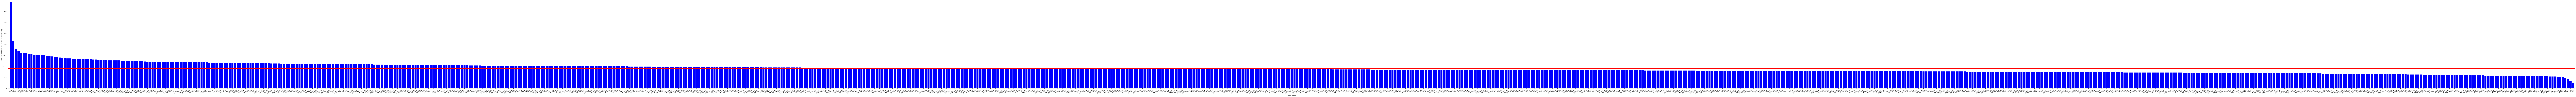

In [45]:
x_axis = np.arange(len(uspc_class_summary_df['average_days']))
plt.bar(x_axis, uspc_class_summary_df['average_days'], color="b", align="center")


plt.xticks(x_axis, uspc_class_summary_df.index, rotation=45)


fig = plt.gcf()
fig.set_size_inches(300.5, 10.5)

plt.xlim(-1, len(x_axis)-0.25)
plt.ylim(0, max(uspc_class_summary_df['average_days'])+50)

plt.xlabel("uspc_class")
plt.ylabel("days between patent issue to patent filing")

plt.axhline(y=uspc_class_summary_df['average_days'].mean(), color='r', linestyle='solid', linewidth = 4)

fig.savefig('application_data_3', dpi=100)

plt.show()

In [46]:
# #alternative method to generate the DataFrame using loop
# total_application_byclass = []
# total_delta_byclass = []

# uspc_class_list_items = m_resetindex['uspc_class'].unique()

# for uspc_class_item in uspc_class_list_items:
#     summed_cases = 0
#     summed_delta = 0
    
#     df2 = m_resetindex.loc[m_resetindex['uspc_class'] == uspc_class_item]
    
#     summed_cases = df2['patented_cases_per_class'].sum()
#     total_application_byclass.append(summed_cases)
    
#     summed_delta = df2['total_delta'].sum()
#     total_delta_byclass.append(summed_delta)

# # print(total_application_byclass)
# # print(total_delta_byclass)
        
# uspc_class_summary_df = pd.DataFrame({
#     "uspc_class": uspc_class_list_items,
#     "total_application_byclass": total_application_byclass,
#     "total_delta_byclass": total_delta_byclass
# })

# uspc_class_summary_df.tail(5)

In [47]:
# Section below will check on patented rate by uspc_class. Looser requirements below since only checking on patented rate.

In [48]:
application_cleaned.head(5)

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator
0,2000161,NaN,Utility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISSING,2000-01-21,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
1,2022946,NaN,Utility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISSING,2000-01-21,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
2,2032617,NaN,Utility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISSING,2000-01-21,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
3,2045760,1948-08-23,NaN,NaN,NaN,NaN,NaN,NaN,Patented File - (Old Case Added for File Track...,1986-04-25,FILE REPOSITORY (FRANCONIA),1986-08-11,NaN,NaN,2480888,1949-09-06,BOX STAYING MACHINE,UNDISCOUNTED
4,2048602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Patented File - (Old Case Added for File Track...,1984-03-22,FILE REPOSITORY (FRANCONIA),2018-11-06,NaN,NaN,RE19792,1935-12-17,NaN,UNDISCOUNTED


In [49]:
application_cleaned_groupbyclass = application_cleaned.groupby(['uspc_class'])
application_cleaned_groupbyclass.count()
application_cleaned_groupbyclass_pd = pd.DataFrame(application_cleaned_groupbyclass.count())
application_cleaned_groupbyclass_pd
# application_cleaned_class_pd.index

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator
uspc_class,,,,,,,,,,,,,,,,,
0.0,57317,57317,57317,4959,57317,57317,57316,57287,57287,57317,0,0,0,0,0,57317,57317
1.0,9496,9471,9495,9494,9496,9496,8830,8545,8545,9496,0,0,0,0,0,9489,9496
2.0,6217,6211,6217,6143,6217,6213,5863,5988,5988,6217,0,5332,5332,2049,2049,6217,6217
4.0,3596,3590,3596,3563,3596,3595,3449,3532,3532,3596,1,3049,3049,1809,1809,3596,3596
5.0,4638,4631,4638,4604,4638,4633,4500,4429,4429,4638,1,3833,3833,2152,2152,4638,4638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D96,1,1,1,0,1,1,0,1,1,1,1,0,0,1,1,1,1
D99,2099,2098,2099,2088,2099,2092,1820,2064,2064,2099,1072,2,2,2050,2050,2099,2099
ENG,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1


In [50]:
# Check the uspc_class that has the most applications
application_cleaned_groupbyclass_pd.sort_values(["application_number"], ascending = False).head(10)

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator
uspc_class,,,,,,,,,,,,,,,,,
514,196500,195902,196499,171506,196469,186099,192152,194245,194245,196500,69124,97281,97281,103331,103331,196498,196497
435,168540,168036,168538,152957,168505,164703,164198,166259,166259,168540,59631,85776,85776,81250,81250,168537,168538
424,168511,168315,168510,156211,168480,165849,160969,166181,166181,168511,58012,95062,95062,81738,81738,168490,168511
001,166150,166126,166150,166143,166150,166149,164790,161946,161946,166150,12,1,1,12,12,166150,166150
370,150331,150270,150331,138236,150328,149396,147577,148137,148137,150331,23676,102273,102273,100970,100970,150330,150331
257,146513,146485,146513,139991,146512,146177,144952,144198,144198,146513,30899,109322,109322,105101,105101,146511,146513
428,126593,126507,126593,119303,126587,125859,121228,125415,125415,126593,61647,59402,59402,78685,78685,126583,126593
705,120092,120028,120092,115835,120091,119630,115783,116798,116798,120092,6317,96700,96700,37908,37908,120091,120091
455,111943,111874,111943,102960,111940,111242,109269,110806,110806,111943,20418,75607,75607,75117,75117,111939,111943


In [51]:
application_cleaned_groupbyclass_pd['application_number'].sum()  # indicate the total applications that has a uspc_class value

10762455

In [52]:
# Make a DataFrame to get ready for the final patented rate DataFrame

In [53]:
application_cleaned_groupbyclass_pd["application_number"]
application_cleaned_groupbyclass_pd_application_number = pd.DataFrame(application_cleaned_groupbyclass_pd["application_number"])
application_cleaned_groupbyclass_pd_application_number

application_cleaned_groupbyclass_pd_application_number.reset_index(inplace=True)
application_cleaned_groupbyclass_pd_application_number
application_cleaned_groupbyclass_pd_application_number = application_cleaned_groupbyclass_pd_application_number.rename(columns = {'application_number':'application_number_all'})
application_cleaned_groupbyclass_pd_application_number

,uspc_class,application_number_all
0,0,57317
1,1,9496
2,2,6217
3,4,3596
4,5,4638
...,...,...
1010,D96,1
1011,D99,2099
1012,ENG,1
1013,PLT,28001


In [54]:
# Get a DataFrame that only picks up patented cases and go through same steps as above

application_cleaned_patented = application_cleaned.loc[(application_cleaned["appl_status_desc"] == "Patented Case") | (application_cleaned["appl_status_desc"] == "Patented File - (Old Case Added for File Tracking Purposes)") , :]
application_cleaned_patented.head()
application_cleaned_patented.to_csv("csv_output/application_cleaned_patented.csv")

In [55]:
application_cleaned_patented.groupby(['uspc_class'])
application_cleaned_patented.groupby(['uspc_class']).count()

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator
uspc_class,,,,,,,,,,,,,,,,,
2.0,1858,1858,1858,1858,1858,1858,1813,1858,1858,1858,0,1600,1600,1858,1858,1858,1858
4.0,1628,1628,1628,1628,1628,1628,1594,1628,1628,1628,0,1403,1403,1628,1628,1628,1628
5.0,1897,1897,1897,1897,1897,1897,1857,1897,1897,1897,0,1602,1602,1897,1897,1897,1897
7.0,79,79,79,79,79,79,78,79,79,79,0,60,60,79,79,79,79
8.0,816,816,816,816,816,816,813,816,816,816,0,789,789,816,816,816,816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D96,1,1,1,0,1,1,0,1,1,1,1,0,0,1,1,1,1
D99,2017,2016,2017,2013,2017,2017,1757,2017,2017,2017,1064,0,0,2017,2017,2017,2017
ENG,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1


In [56]:
application_cleaned_patented_groupbyclass = pd.DataFrame(application_cleaned_patented.groupby(['uspc_class']).count())
application_cleaned_patented_groupbyclass

application_cleaned_patented_groupbyclass["application_number"]
application_cleaned_patented_groupbyclass_application_number = pd.DataFrame(application_cleaned_patented_groupbyclass["application_number"])
application_cleaned_patented_groupbyclass_application_number

application_cleaned_patented_groupbyclass_application_number.reset_index(inplace=True)
application_cleaned_patented_groupbyclass_application_number = application_cleaned_patented_groupbyclass_application_number.rename(columns = {'application_number':'application_number_patented'})
application_cleaned_patented_groupbyclass_application_number

,uspc_class,application_number_patented
0,2,1858
1,4,1628
2,5,1897
3,7,79
4,8,816
...,...,...
993,D96,1
994,D99,2017
995,ENG,1
996,PLT,26454


In [57]:
# Have an inner merge for two DataFrame above

uspc_class = pd.merge(application_cleaned_groupbyclass_pd_application_number, application_cleaned_patented_groupbyclass_application_number, on=["uspc_class"])
uspc_class

,uspc_class,application_number_all,application_number_patented
0,2,6217,1858
1,4,3596,1628
2,5,4638,1897
3,7,195,79
4,8,1922,816
...,...,...,...
993,D96,1,1
994,D99,2099,2017
995,ENG,1,1
996,PLT,28001,26454


In [58]:
uspc_class["application_number_all"].max()
uspc_class.loc[uspc_class["application_number_all"] == 196500, :]

,uspc_class,application_number_all,application_number_patented
863,514,196500,50752


In [59]:
uspc_class['patented_rate'] = uspc_class['application_number_patented'] / uspc_class['application_number_all']

uspc_class['patented_rate'].astype(float)

pd.set_option('display.max_rows', None)
uspc_class = uspc_class.sort_values(["patented_rate"], ascending = False)
uspc_class
uspc_class['patented_rate'] = uspc_class['patented_rate'].map("{:.4%}".format)
uspc_class.head()

,uspc_class,application_number_all,application_number_patented,patented_rate
773,390,2,2,100.0000%
426,903,1,1,100.0000%
935,808,2,2,100.0000%
711,325,90,90,100.0000%
511,090,11,11,100.0000%


In [60]:
uspc_class['patented_rate'].head()

773    100.0000%
426    100.0000%
935    100.0000%
711    100.0000%
511    100.0000%
Name: patented_rate, dtype: object

In [61]:
uspc_class['patented_rate'] = uspc_class['patented_rate'].map(lambda x: x.rstrip('%'))
uspc_class['patented_rate'] = pd.to_numeric(uspc_class['patented_rate'])
uspc_class['uspc_class'] = uspc_class['uspc_class'].astype(str)

In [62]:
uspc_class.dtypes

uspc_class                      object
application_number_all           int64
application_number_patented      int64
patented_rate                  float64
dtype: object

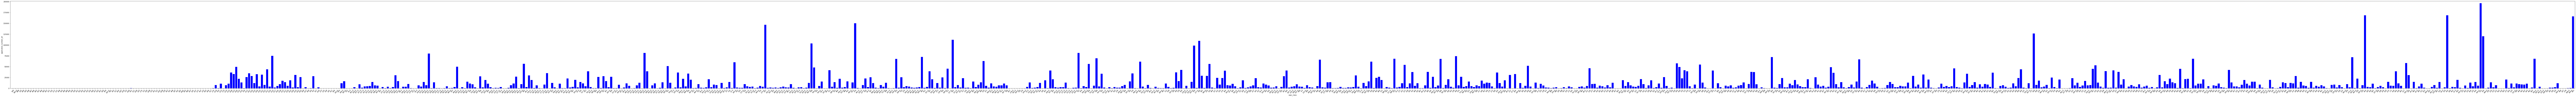

In [63]:
# chart shows the total applicaiton numbers by uspc_class

x_axis = np.arange(len(uspc_class['application_number_all']))
plt.bar(x_axis, uspc_class['application_number_all'], color="b", align="center")

plt.xticks(x_axis, uspc_class['uspc_class'], rotation=45)

fig = plt.gcf()
fig.set_size_inches(300.5, 10.5)

plt.xlim(-1, len(x_axis)-0.25)
plt.ylim(0, max(uspc_class['application_number_all'])+5000)

plt.xlabel('uspc_class')
plt.ylabel('application_number_all')

fig.savefig('application_data_4', dpi=100)

plt.show()

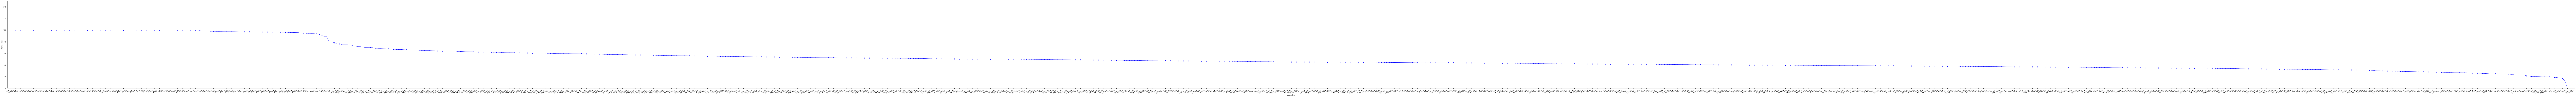

In [64]:
# chart shows the patented rate by uspc_class

plt.plot(x_axis, uspc_class['patented_rate'], marker="+",color="blue", linewidth=1, label="patented_rate")


plt.xticks(x_axis, uspc_class['uspc_class'], rotation=45)



fig1 = plt.gcf()
fig1.set_size_inches(300.5, 10.5)

plt.xlim(-0.1, len(x_axis)-0.1)
plt.ylim(0, max(uspc_class['patented_rate'])+50)

plt.xlabel('uspc_class')
plt.ylabel('patented_rate')

fig1.savefig('application_data_5', dpi=100)

plt.show()

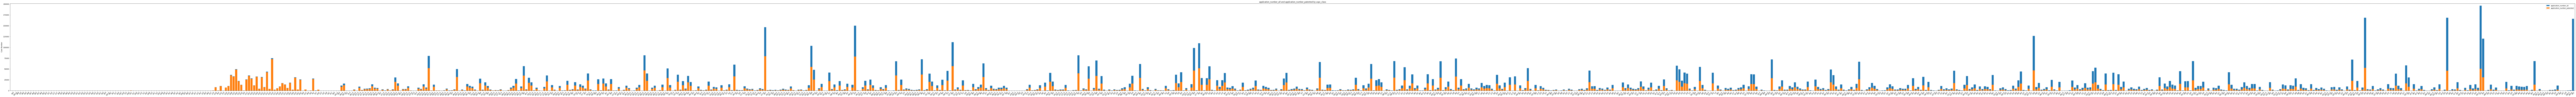

In [65]:
# chart shows the patented/all cases stacked by uspc_class

x_axis = np.arange(len(uspc_class['application_number_all']))
# plt.bar(x_axis, uspc_class['application_number_all'], color="b", align="center")


fig, ax = plt.subplots()

ax.bar(x_axis, uspc_class['application_number_all'], label='application_number_all')
ax.bar(x_axis, uspc_class['application_number_patented'], bottom=0,
       label='application_number_patented')


plt.xticks(x_axis, uspc_class['uspc_class'], rotation=45)


ax.set_ylabel('Case Number')
ax.set_title('application_number_all and application_number_patented by uspc_class')
ax.legend()


fig = plt.gcf()
fig.set_size_inches(300.5, 10.5)

plt.xlim(-1, len(x_axis)-0.25)
plt.ylim(0, max(uspc_class['application_number_all'])+5000)


fig.savefig('application_data_6', dpi=100)

plt.show()

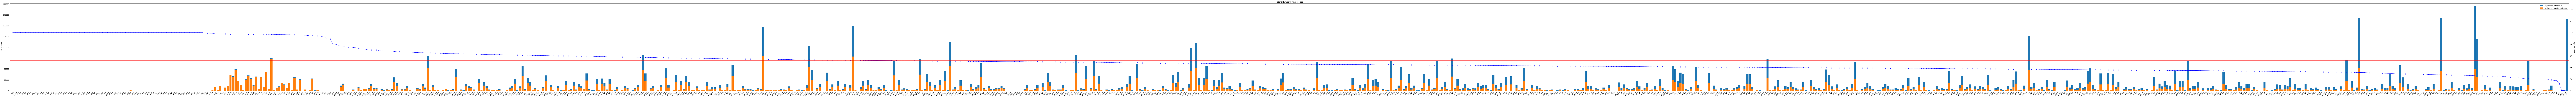

In [66]:
# chart shows the patented/all cases stacked by uspc_class and patented rate by uspc_class

x_axis = np.arange(len(uspc_class['application_number_all']))
# plt.bar(x_axis, uspc_class['application_number_all'], color="b", align="center")


fig, ax = plt.subplots()

ax.bar(x_axis, uspc_class['application_number_all'], label='application_number_all')
ax.bar(x_axis, uspc_class['application_number_patented'], bottom=0,
       label='application_number_patented')


plt.xticks(x_axis, uspc_class['uspc_class'], rotation=45)


ax.set_ylabel('Case Number')
ax.set_title('Patent Number by uspc_class')
ax.legend()


fig = plt.gcf()
fig.set_size_inches(300.5, 10.5)

plt.xlim(-1, len(x_axis)-0.25)
plt.ylim(0, max(uspc_class['application_number_all'])+5000)



axes2 = plt.twinx()
axes2.plot(x_axis, uspc_class['patented_rate'], marker="+",color="blue", linewidth=1, label="patented_rate")
fig1 = plt.gcf()
axes2.set_ylim(0, max(uspc_class['patented_rate'])+50)
axes2.set_ylabel('patented_rate')

plt.axhline(y=uspc_class['patented_rate'].mean(), color='r', linestyle='solid', linewidth = 4)

fig.savefig('application_data_7', dpi=100)

plt.show()

In [67]:
# uspc_class["patented_rate"].describe()

In [68]:
uspc_class_sort = uspc_class.sort_values(["application_number_all", "patented_rate"], ascending = [False, False])
uspc_class_sort.head(30)

,uspc_class,application_number_all,application_number_patented,patented_rate
863,514,196500,50752,25.8280
815,435,168540,46133,27.3721
804,424,168511,52691,31.2686
431,001,166150,7,0.0042
755,370,150331,78732,52.3724
656,257,146513,79510,54.2682
808,428,126593,46650,36.8504
909,705,120092,30762,25.6154
833,455,111943,56758,50.7026
730,345,109589,51559,47.0476


In [69]:
# Merge uspc_class_summary_df (about period required for patented by uspc_class) and uspc_class_sort (patented rate by uspc_class)

In [70]:
uspc_class_summary_df_resetindex  = uspc_class_summary_df.reset_index()
uspc_class_summary_df_resetindex.head()

,uspc_class,patented_cases_per_class,total_delta,average_days,average_years
0,924,1,3927,3927.000000,10.758904
1,199,2,4343,2171.500000,5.949315
2,705,30761,55097663,1791.153181,4.907269
3,715,17129,28831270,1683.184658,4.611465
4,930,2,3259,1629.500000,4.464384


In [71]:
uspc_class_daysandrate = pd.merge(uspc_class_sort, uspc_class_summary_df_resetindex, how='inner', on=['uspc_class'])
uspc_class_daysandrate = uspc_class_daysandrate[['uspc_class', 'application_number_all', 'application_number_patented', 'patented_rate', 'patented_cases_per_class', 'average_years']]
uspc_class_daysandrate.head()

,uspc_class,application_number_all,application_number_patented,patented_rate,patented_cases_per_class,average_years
0,514,196500,50752,25.8280,50751,2.759672
1,435,168540,46133,27.3721,46132,3.317657
2,424,168511,52691,31.2686,52667,3.153648
3,001,166150,7,0.0042,7,3.587867
4,370,150331,78732,52.3724,78730,3.636340


In [72]:
# the application_number_patented and patented_cases_per_class are not exactly the same from the two DataFrames, why? 
# application_number_patented is generated from (application_cleaned_patented.groupby(['uspc_class'])
# patented_cases_per_class is generated from (application_cleaned_nona.groupby(['uspc_class'])) which has stricter requirements

In [73]:
# My interested class are listed here:

In [74]:
uspc_class_gong = uspc_class_daysandrate.loc[(uspc_class_daysandrate["uspc_class"] == "D25") 
               | (uspc_class_daysandrate["uspc_class"] == "D12") 
               | (uspc_class_daysandrate["uspc_class"] == "074") 
               | (uspc_class_daysandrate["uspc_class"] == "052") 
               | (uspc_class_daysandrate["uspc_class"] == "405"), :]
uspc_class_gong.sort_values(['patented_rate'], ascending = False)

,uspc_class,application_number_all,application_number_patented,patented_rate,patented_cases_per_class,average_years
186,D25,12023,11668,97.0473,11668,1.594788
44,D12,43858,42512,96.9310,42508,1.506665
93,074,25947,10678,41.1531,10674,2.514654
159,405,14319,5401,37.7191,5400,2.232857
45,052,42476,14532,34.2123,14522,2.513783


In [75]:
# Since D25 and D12 have close patented rate, making me interested to check on their property: patent_issue_and_file_date_delta

In [76]:
# section below is to check on small_entity_indicator

In [77]:
application_cleaned_nona.sort_values(["patent_issue_and_file_date_delta"], ascending = False).head(3)

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator,patent_issue_and_file_date_delta
43,2682096,1933-07-25,Utility,"GREGORY, BERNARR E",3662,380,026000,NaN,Patented Case,2000-07-12,FILE REPOSITORY (FRANCONIA),2018-06-23,NaN,NaN,6097812,2000-08-01,NaN,UNDISCOUNTED,24479
7,2107244,1936-10-23,Utility,"GREGORY, BERNARR E",3662,380,026000,NaN,Patented Case,2000-09-20,FILE REPOSITORY (FRANCONIA),2018-06-23,NaN,NaN,6130946,2000-10-10,NaN,UNDISCOUNTED,23363
35,2618355,1945-09-24,Utility,"KEITH, JACK W",3641,423,149000,S-2509,Patented Case,2004-06-24,OTHER,2019-02-08,NaN,NaN,6761862,2004-07-13,METHOD OF DETERMINING THE EXTENT TO WHICH A NI...,UNDISCOUNTED,21477


In [78]:
application_cleaned_nona.count()

application_number                  4964813
filing_date                         4964813
application_invention_type          4964794
examiner_full_name                  4900260
examiner_art_unit                   4964721
uspc_class                          4964813
uspc_subclass                       4964796
atty_docket_number                  4734175
appl_status_desc                    4964813
appl_status_date                    4964813
file_location                       4964813
file_location_date                  1477008
earliest_pgpub_number               2913174
earliest_pgpub_date                 2913174
patent_number                       4964813
patent_issue_date                   4964813
invention_title                     4964380
small_entity_indicator              4964803
patent_issue_and_file_date_delta    4964813
dtype: int64

In [79]:
application_cleaned_nona['small_entity_indicator'].value_counts(normalize=True)* 100

UNDISCOUNTED    78.671017
SMALL           19.959080
MICRO            1.369903
Name: small_entity_indicator, dtype: float64

In [80]:
# how to quality for micro???

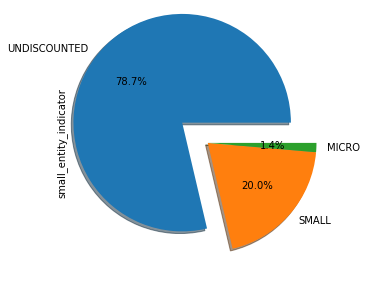

In [81]:
explode = (0.3, 0, 0)
application_cleaned_nona['small_entity_indicator'].value_counts().plot.pie(y='small_entity', autopct="%.1f%%", shadow=True, explode=explode, figsize=(5, 5))

fig = plt.gcf()
fig.savefig('application_data_8', dpi=100)
